In [1]:
import glob
from pathlib import Path
from typing import Dict
import numpy as np

from model_training.cnn_classifier import CNNClassifier

In [2]:
model = CNNClassifier("../models/first-milestone")

In [3]:
model.fit(
    "../data/tsrc_sprectrograms/train", 
    "../data/tsrc_sprectrograms/validation",
    batch_size=32,
    n_epochs=10,
)

p:\MINI8\I2ML\intro-to-ml\venv\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Running training on GPU...


 10%|█         | 1/10 [01:21<12:14, 81.58s/it]

Epoch 0 Done after 81.5745301246643 seconds


 20%|██        | 2/10 [02:13<08:31, 63.90s/it]

Epoch 1 Done after 51.52048420906067 seconds


 30%|███       | 3/10 [03:04<06:48, 58.41s/it]

Epoch 2 Done after 51.88786482810974 seconds


 40%|████      | 4/10 [03:56<05:34, 55.80s/it]

Epoch 3 Done after 51.780816316604614 seconds


 50%|█████     | 5/10 [04:49<04:33, 54.62s/it]

Epoch 4 Done after 52.5004723072052 seconds


 60%|██████    | 6/10 [05:39<03:32, 53.08s/it]

Epoch 5 Done after 50.08935046195984 seconds


 70%|███████   | 7/10 [06:30<02:37, 52.47s/it]

Epoch 6 Done after 51.20376992225647 seconds


 80%|████████  | 8/10 [07:21<01:43, 51.99s/it]

Epoch 7 Done after 50.97914791107178 seconds


 90%|█████████ | 9/10 [08:13<00:51, 51.85s/it]

Epoch 8 Done after 51.52081751823425 seconds


100%|██████████| 10/10 [09:05<00:00, 54.53s/it]

Epoch 9 Done after 52.223806619644165 seconds
Finished Training


In [3]:
from typing import List

from matplotlib import pyplot as plt


def get_true_and_predicted_labels(model : CNNClassifier, path: str) -> Dict[str, int]:
    true_labels = get_true_labels(path)
    predictions = model.predict(path)

    y_true = []
    y_pred = []

    for file in true_labels:
        y_true.append(true_labels[file])
        y_pred.append(predictions[file])

    return y_true, y_pred

def get_true_labels(path: str) -> Dict[str, int]: 
    positive_label_files = [Path(file).stem for file in glob.glob(f"{path}/1/*")]
    negative_label_files = [Path(file).stem for file in glob.glob(f"{path}/0/*")]

    file_dicionary = {file : 1 for file in positive_label_files}
    file_dicionary.update({file : 0 for file in negative_label_files})

    return file_dicionary

def accuracy(y_true: List[int], y_pred: List[int]) -> float:
    correct = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1
    return correct / len(y_true)


def f1_score(y_true: List[int], y_pred: List[int]) -> float:
    confusion = confusion_matrix(y_true, y_pred)
    
    tp = confusion[1, 1]
    fp = confusion[0, 1]
    fn = confusion[1, 0]
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    return 2 * (precision * recall) / (precision + recall)

def confusion_matrix(y_true: List[int], y_pred: List[int]):
    n_classes = 2
    confusion = np.zeros((n_classes, n_classes))
    
    for true, pred in zip(y_true, y_pred):
        confusion[true, pred] += 1
        
    return confusion

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm_normalized.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, f'{cm[i, j]} ({cm_normalized[i, j]:.2f})', 
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Accuracy: 0.5633802816901409
F1 Score: 0.6075949367088608


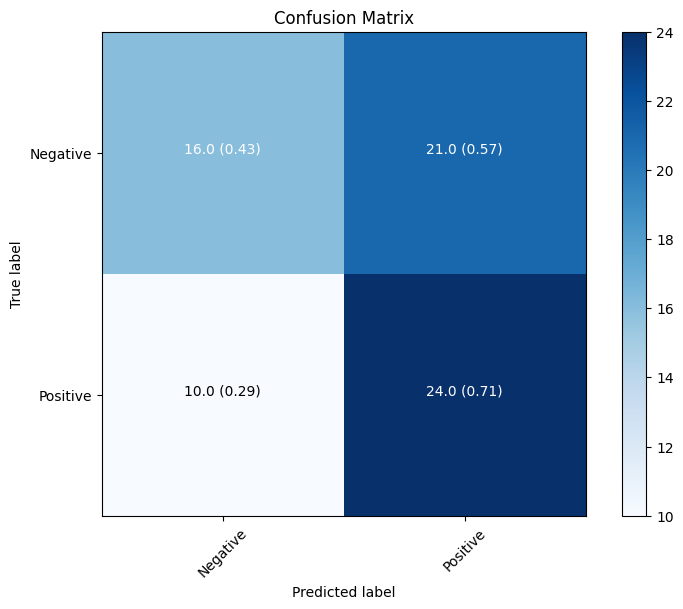

In [4]:
y_true, y_pred = get_true_and_predicted_labels(model, "../data/tsrc_sprectrograms/test")

print(f"Accuracy: {accuracy(y_true, y_pred)}")
print(f"F1 Score: {f1_score(y_true, y_pred)}")

plot_confusion_matrix(confusion_matrix(y_true, y_pred), ["Negative", "Positive"])

(array([ 25.,   0.,  71.,   0.,   0., 149.,   0., 232.,   0.,   0., 347.,
          0.,   0., 280.,   0., 205.,   0.,   0.,  80.,   0.,  26.,   0.,
          0.,   3.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,   3.,   0.,
          1.,   0.,   0.,   7.,   0., 124.]),
 array([15.        , 15.38461538, 15.76923077, 16.15384615, 16.53846154,
        16.92307692, 17.30769231, 17.69230769, 18.07692308, 18.46153846,
        18.84615385, 19.23076923, 19.61538462, 20.        , 20.38461538,
        20.76923077, 21.15384615, 21.53846154, 21.92307692, 22.30769231,
        22.69230769, 23.07692308, 23.46153846, 23.84615385, 24.23076923,
        24.61538462, 25.        , 25.38461538, 25.76923077, 26.15384615,
        26.53846154, 26.92307692, 27.30769231, 27.69230769, 28.07692308,
        28.46153846, 28.84615385, 29.23076923, 29.61538462, 30.        ]),
 <BarContainer object of 39 artists>)

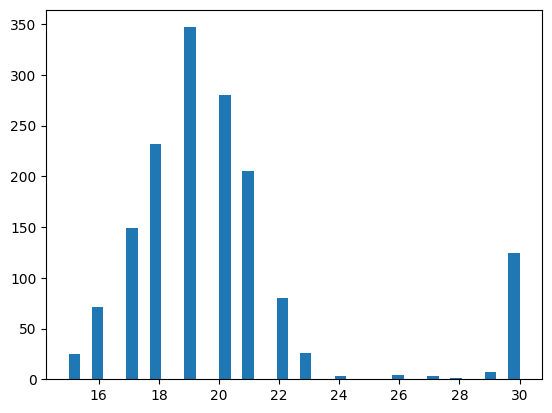

In [8]:
import glob
from typing import Dict, List

from matplotlib import pyplot as plt
from numpy import sqrt


files = glob.glob("../data/tsrc_train_test/train/**/*_nohash_0.wav", recursive=True)
speaker_id_to_files: Dict[str, List[str]] = {}

for file in files:
    speaker_id = file.split("\\")[-1].split("_")[-3]
    if speaker_id not in speaker_id_to_files:
        speaker_id_to_files[speaker_id] = []
    speaker_id_to_files[speaker_id].append(file)


file_occurances = [len(files) for files in speaker_id_to_files.values()]
plt.hist(file_occurances, bins=int(sqrt(len(file_occurances))))